In [ ]:
import pandas as pd
import random 
import numpy as np
import matplotlib.pyplot as plt 
import os 
import cv2
import warnings
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm, trange
import skimage
from skimage.transform import resize
##
from sklearn.model_selection import train_test_split
##
from sklearn.utils import shuffle
##
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam

In [ ]:
#params
train_path = r'E:\code\AI\Sign-language\asl_alphabet_train'
image_size = 64

In [ ]:
label2class = {
}
for i in range(ord('A'), ord('Z')+1):
    label2class[chr(i)] = i - ord('A')
    label2class[i - ord('A')] = chr(i)
label2class['del'] = 26
label2class['nothing'] = 27
label2class['space'] = 28
label2class[26] = 'del'
label2class[27] = 'nothing'
label2class[28] = 'space'
print(label2class)

def load_data(folder):
    X = [] # data
    y = [] # data lable
    for folderName in os.listdir(train_path):
        if not folderName.startswith('.'):
            if folderName in label2class:
                    label = label2class[folderName]
            count = 700
            for image_fileName in tqdm(os.listdir(folder + '/' +folderName)):    
                img_file = cv2.imread(folder + "/" +folderName + '/' + image_fileName)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (image_size, image_size, 1))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
                    count -= 1
                    if count == -1: break
    X = np.asarray(X)
    y = np.asarray(y)

    return X, y
            


{'A': 0, 0: 'A', 'B': 1, 1: 'B', 'C': 2, 2: 'C', 'D': 3, 3: 'D', 'E': 4, 4: 'E', 'F': 5, 5: 'F', 'G': 6, 6: 'G', 'H': 7, 7: 'H', 'I': 8, 8: 'I', 'J': 9, 9: 'J', 'K': 10, 10: 'K', 'L': 11, 11: 'L', 'M': 12, 12: 'M', 'N': 13, 13: 'N', 'O': 14, 14: 'O', 'P': 15, 15: 'P', 'Q': 16, 16: 'Q', 'R': 17, 17: 'R', 'S': 18, 18: 'S', 'T': 19, 19: 'T', 'U': 20, 20: 'U', 'V': 21, 21: 'V', 'W': 22, 22: 'W', 'X': 23, 23: 'X', 'Y': 24, 24: 'Y', 'Z': 25, 25: 'Z', 'del': 26, 'nothing': 27, 'space': 28, 26: 'del', 27: 'nothing', 28: 'space'}


In [ ]:
X_train, y_train = load_data(train_path)
print("X shape", X_train.shape)
print("y shape", y_train.shape)

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

X shape (20329, 64, 64, 1)
y shape (20329,)


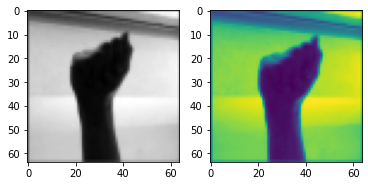

In [ ]:
#display image
plt.subplot(1,2,1)
plt.imshow(X_train[0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(X_train[1])

In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2) 

# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
from keras.utils.np_utils import to_categorical
y_trainHot = to_categorical(y_train, num_classes = 30)
y_testHot = to_categorical(y_test, num_classes = 30)



In [ ]:
X_train, y_trainHot = shuffle(X_train, y_trainHot, random_state=13)
X_test, y_testHot = shuffle(X_test, y_testHot, random_state=13)
# X_train = X_train[:3000]
# X_test = X_test[:30000]
# y_trainHot = y_trainHot[:30000]
# y_testHot = y_testHot[:30000]
print(X_train.shape, y_trainHot.shape)
print(X_test.shape, y_testHot.shape)

(16263, 64, 64, 1) (16263, 30)
(4066, 64, 64, 1) (4066, 30)


In [ ]:
# dimension of (64,64,1) is 3 because kernel requires 3 dimensions. Number "1" shows that it is used as gray scale. kernel_size means that dimension of filter. 
model = Sequential()
#
model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(30, activation = "softmax"))

In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 128)       3328      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 21, 21, 128)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 21, 21, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 64)        73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 32)       

In [ ]:
# Define the optimizer
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)
# Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train,y_trainHot,epochs=15,validation_data=(X_test,y_testHot))

Epoch 1/15
509/509 [==============================] - 111s 218ms/step - loss: 2.7002 - accuracy: 0.1981 - val_loss: 1.5028 - val_accuracy: 0.5332
Epoch 2/15
509/509 [==============================] - 111s 217ms/step - loss: 1.1279 - accuracy: 0.6349 - val_loss: 0.6644 - val_accuracy: 0.7971
Epoch 3/15
509/509 [==============================] - 112s 219ms/step - loss: 0.6101 - accuracy: 0.7966 - val_loss: 0.2711 - val_accuracy: 0.9206
Epoch 4/15
509/509 [==============================] - 111s 219ms/step - loss: 0.4027 - accuracy: 0.8628 - val_loss: 0.1633 - val_accuracy: 0.9599
Epoch 5/15
509/509 [==============================] - 115s 226ms/step - loss: 0.3063 - accuracy: 0.8966 - val_loss: 0.1211 - val_accuracy: 0.9690
Epoch 6/15
509/509 [==============================] - 112s 221ms/step - loss: 0.2414 - accuracy: 0.9183 - val_loss: 0.0898 - val_accuracy: 0.9801
Epoch 7/15
509/509 [==============================] - 113s 222ms/step - loss: 0.1934 - accuracy: 0.9345 - val_loss: 0.0729 -

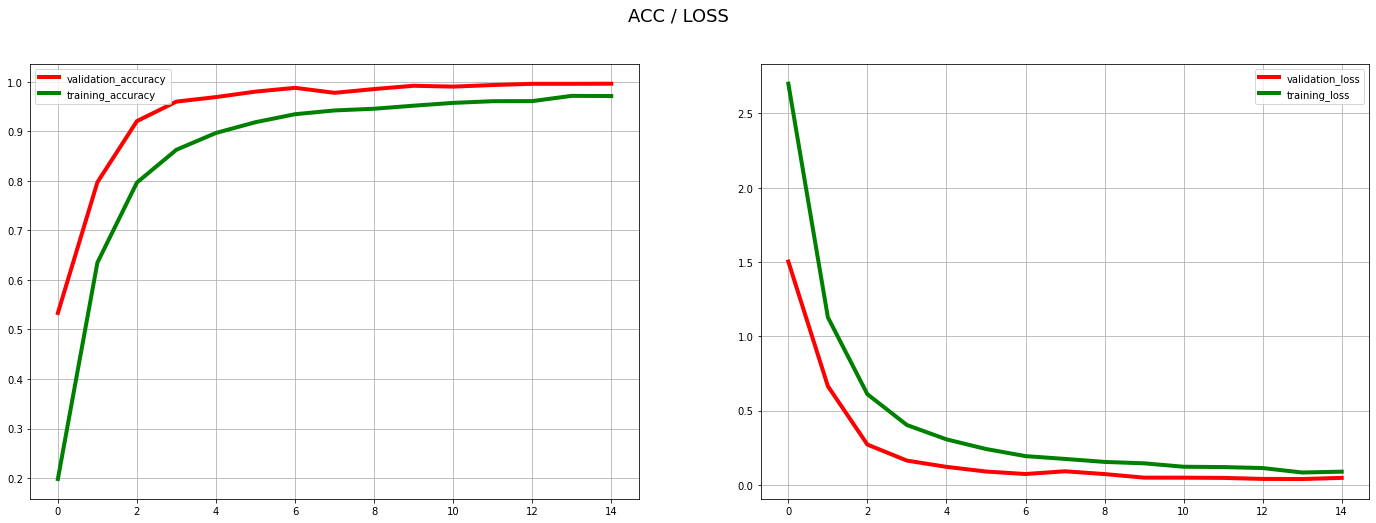

In [ ]:
#Evaluate 
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(history.history["val_accuracy"], label="validation_accuracy", c="red", linewidth=4)
plt.plot(history.history["accuracy"], label="training_accuracy", c="green", linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history["val_loss"], label="validation_loss", c="red", linewidth=4)
plt.plot(history.history["loss"], label="training_loss", c="green", linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()

In [ ]:
#save model
model.save('SL_model1.h5')

I guess : S |   x = A_test.jpg


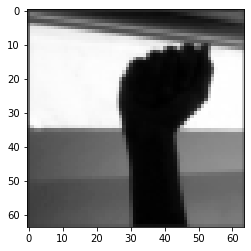

I guess : B |   x = B_test.jpg


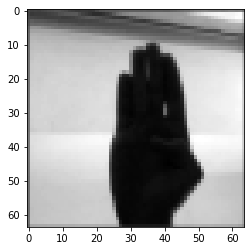

I guess : C |   x = C_test.jpg


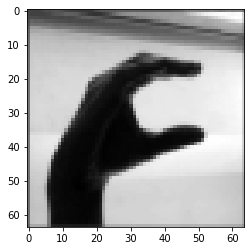

I guess : D |   x = D_test.jpg


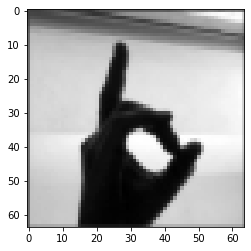

I guess : E |   x = E_test.jpg


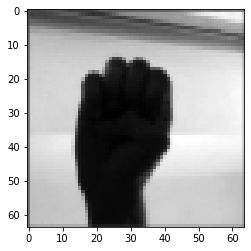

I guess : F |   x = F_test.jpg


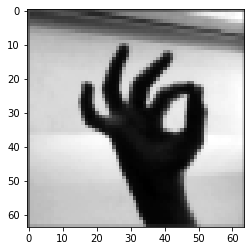

I guess : G |   x = G_test.jpg


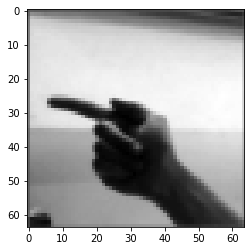

I guess : H |   x = H_test.jpg


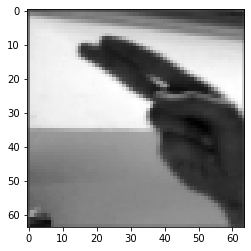

I guess : I |   x = I_test.jpg


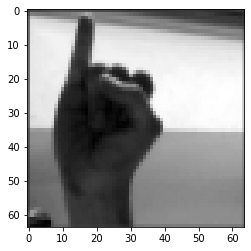

I guess : J |   x = J_test.jpg


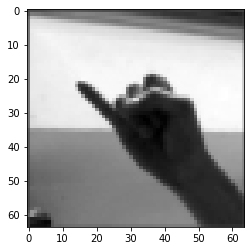

I guess : K |   x = K_test.jpg


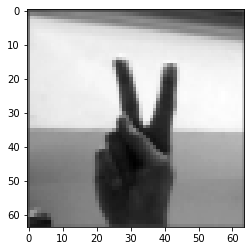

I guess : L |   x = L_test.jpg


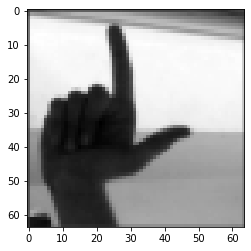

I guess : M |   x = M_test.jpg


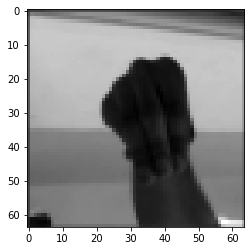

I guess : nothing |   x = nothing_test.jpg


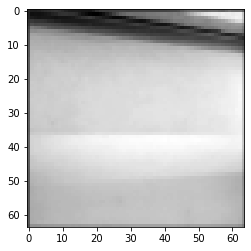

I guess : N |   x = N_test.jpg


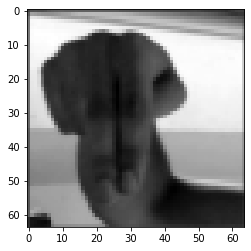

I guess : O |   x = O_test.jpg


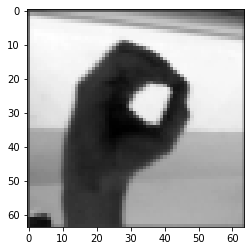

I guess : P |   x = P_test.jpg


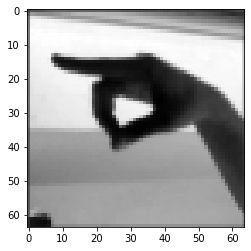

I guess : Q |   x = Q_test.jpg


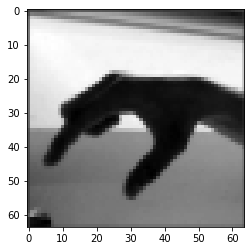

I guess : U |   x = R_test.jpg


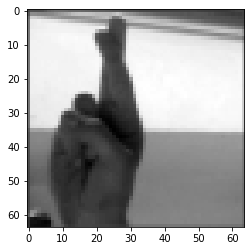

I guess : space |   x = space_test.jpg


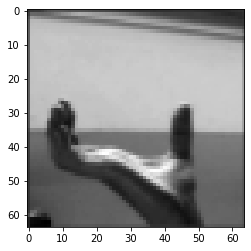

I guess : S |   x = S_test.jpg


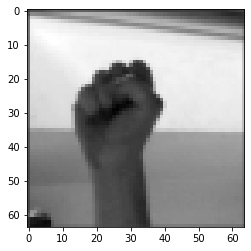

I guess : T |   x = T_test.jpg


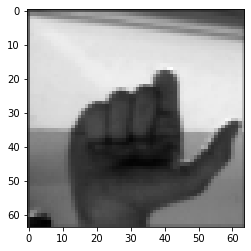

I guess : U |   x = U_test.jpg


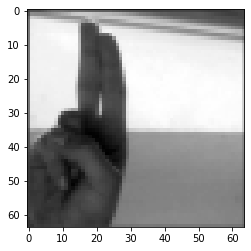

I guess : V |   x = V_test.jpg


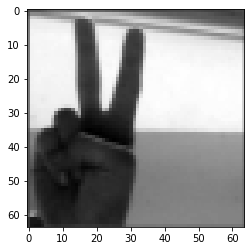

I guess : W |   x = W_test.jpg


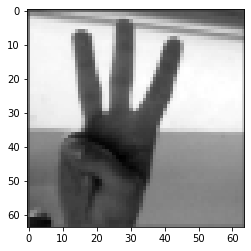

I guess : X |   x = X_test.jpg


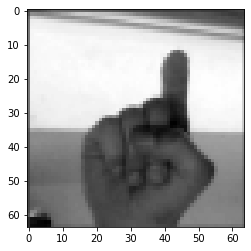

I guess : Y |   x = Y_test.jpg


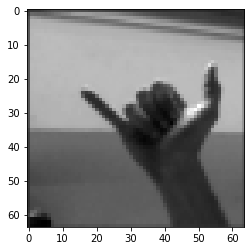

I guess : Z |   x = Z_test.jpg


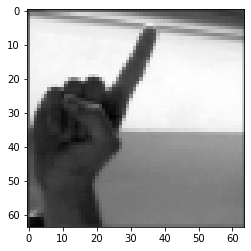

In [ ]:
test_path = r'E:\code\AI\Sign-language\asl_alphabet_test'
test_list = os.listdir(test_path)
for x in test_list:
    img = cv2.imread(test_path +'/'+x)
    img_file = skimage.transform.resize(img, (image_size, image_size, 1))
    img_arr = np.asarray(img_file)
    img_arr = img_arr.reshape(1, 64, 64, 1)
    prediction = model.predict(img_arr)
    print(f"I guess : {label2class[np.argmax(prediction)]} | ", ' x =', x)    
    img_rgb = plt.imread(test_path+'/'+x)
    plt.imshow(img_file, cmap='gray')
    plt.show()

In [ ]:
import keras
new_model = keras.models.load_model('SL_model1.h5')
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 128)       3328      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 21, 21, 128)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 21, 21, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 64)        73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 32)       

In [ ]:
loss, acc = new_model.evaluate(X_train, y_trainHot)

509/509 [==============================] - 24s 47ms/step - loss: 0.0094 - accuracy: 0.9980
